Austin Feydt (apf31)

EECS 531 - A1

21 February 2018

# Exercise 2 : Edge Detector

# Mathematical Background:


In image processing, a very common problem is locating "edges" of objects in an image.  While humans can easily detect what is and isn't an edge, it can be difficult to derive a mathematical representation of an edge.  Most commonly, we consider points in an image in which the brightness of the image changes sharply/has discontinuities (although it is not this simple in practice).

&nbsp;

One of the earliest and most well-known methods for edge detection is the Sobel operator.  It is comprised of two filters:
$$L_x = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
,
L_y = \begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{bmatrix}$$

Both of these kernels are convolved with the original image to approximate derivates ($L_x$ for the horizontal component, and $L_y$ for vertical component).  These components are then combined to produce the "edge" image.

&nbsp;

Another edge detection technique involves using Gabor functions.  A Gabor function is composed of a 2D Gaussian filter multiplied by a Sinusoidal grid:

&nbsp;

![](A1_Images/gabor_ex.png)

By varying the coordinate positions, orientation, phase (of the sine wave), we can generate a number of different Gabor features, which each are useful in detecting features in different directions:

&nbsp;

![](A1_Images/gabor_all.png)

We can convolve any of these Gabor features with an image to detect edges.


# Implementation:
In order to implement an edge detector, I found the scikit-image package to be the simplest implementation.  It has built in edge detectors, of which I used the sobel filter and gabor filter (with different frequency values).

In [20]:
from skimage import io
from skimage.data import camera
from skimage.filters import sobel, gabor, gaussian
import warnings
warnings.filterwarnings('ignore')

Images:
original image:


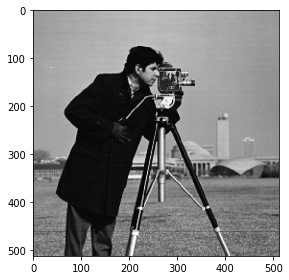

Sobel edges:


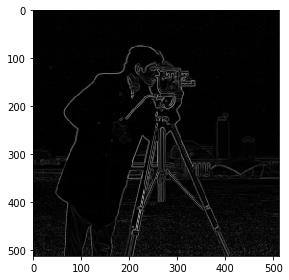

Gabor edges (frequency = 0.7)


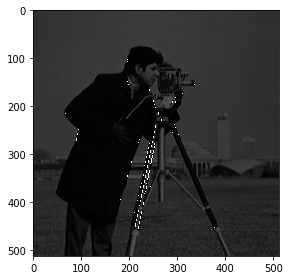

Gabor edges (frequency = 0.4, theta = 0.78)


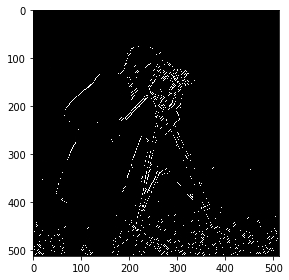

Gabor edges (frequency = 0.2)


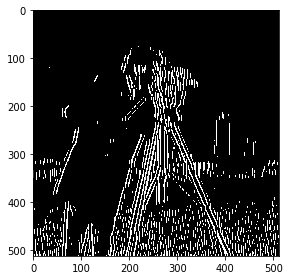

Gabor edges (frequency = 0.2, theta = 0.78)


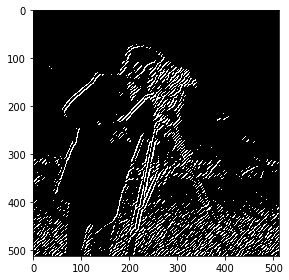

In [53]:
# generating image provided by skimage
print("Images:")
image = camera()
print("original image:")
io.imshow(image)
io.show()

sobel_edges = sobel(image)
print("Sobel edges:")
io.imshow(sobel_edges)
io.show()

gabor_1, z = gabor(image, frequency = 0.7)
print("Gabor edges (frequency = 0.7)")
io.imshow(gabor_1)
io.show()

gabor_2, z = gabor(image, frequency = 0.4, theta = 0.78)
print("Gabor edges (frequency = 0.4, theta = 0.78)")
io.imshow(gabor_2)
io.show()

gabor_3, z = gabor(image, frequency = 0.2)
print("Gabor edges (frequency = 0.2)")
io.imshow(gabor_3)
io.show()

gabor_4, z = gabor(image, frequency = 0.2, theta = 0.78)
print("Gabor edges (frequency = 0.2, theta = 0.78)")
io.imshow(gabor_4)
io.show()

# Results:


From all of the above images, we immediately notice how much more detailed the Sobel edges are than any of the Gabor edges.  This can be attributed to the fact that the Gabor filters used were only $3x3$ matrices. These kernels are so small that they are able to pick up even the smallest of details (like the man's ear and the barely visible fingers of his right hand).  With this detailed edge detection obviously comes with a price: runtime.  Although runtime is irrelevant when only dealing with filtering a single image, it becomes increasingly important as we consider more and more images.  Thus, unless one needs an extremely detailed edge map, perhaps Sobel edge detection isn't entirely necessary.

For the Gabor edge detection, we were dealing with much larger kernels, so it is extremely difficult to detect the subtle edges in our photo (especially if the frequency is too high to detect small details). However, by adjusting the frequency of the sine wave composing the filter, and also rotating the filter, we are able to focus in on key edges: vertical ones, horizontal ones, and diagonal ones.

# Experimental Work: Blurring Before Edge Detection:
The Sobel filter (and Gabor filter with small frequency values) both produced some extraneous edges, such as the texture in the grass in the image.  From our knowledge in Exercise 1, we know that blurring filters are meant to smooth the image and reduce noise.  So, would it make sense for a blurring filter to fine-tune our edge detection to only focus on "important" edges? 

Original image after a strong gaussian blur (standard deviation of 2):


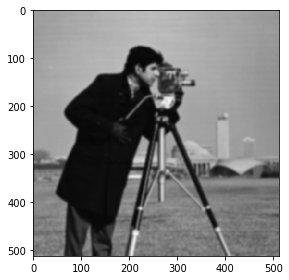

Sobel edges after a strong gaussian blur (standard deviation of 2):


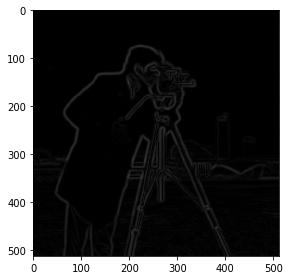

Gabor edges (sine frequency=0.2, rotated 0.78 radians)after a strong gaussian blur (standard deviation of 2):


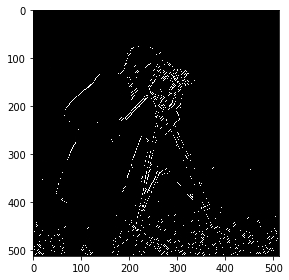

In [59]:
image = camera()
image = gaussian(image, sigma = 2)
print("Original image after a strong gaussian blur (standard deviation of 2):")
io.imshow(image)
io.show()

sobel_blur = sobel(image)
print("Sobel edges after a strong gaussian blur (standard deviation of 2):")
io.imshow(sobel_blur)
io.show()

gabor_blur,z = gabor(image, frequency = 0.2, theta = 0.78)
print("Gabor edges (sine frequency=0.2, rotated 0.78 radians)after a strong gaussian blur (standard deviation of 2):") 
io.imshow(gabor_2)
io.show()

# Exploratory Results:


From these images, we can see that applying a very strong blur (gaussian with a standard deviation of 2), helps reduce the amount of noise (in this case, the grass texture) in the picture.  However, it does not blur the picture enough to lose any quality of the edge detectors when detecting important features (like the photographer and his camera).  Thus, it seems reasonable to blur an image prior to applying an edge-detector if you are solely interested in the most prominent edges in the picture.